In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class svm:
    
    def __init__(self):
        self.w=[]
        self.b=0
        
    def grad(self,x_input,y_true,w_final,b_final,lgrange_parameter,learn_rate):
        iteration=50000
        w_final=np.array(w_final)
        
        for i in range(1,iteration):
                                
            for j in range(len(y_true)):
                if ((y_true[j]*(np.dot(w_final,x_input[j])+b_final)) < 1):
                    w_final-=learn_rate*(w_final+lgrange_parameter*((-1*y_true[j])*x_input[j]))/iteration
                    b_final-=learn_rate*(lgrange_parameter*(-y_true[j]))/iteration
                else:    
                    w_final-=(learn_rate*w_final)/iteration
                
        return w_final,b_final
            
    def fit(self,x_input,y_true,w_initial,b_initial,lgrange_parameter,learn_rate):
        attri_len=x_input.shape[1]
        for i in range(attri_len):
            self.w.append(w_initial)
        self.b=b_initial
        
        self.w,self.b=self.grad(x_input,y_true,self.w,self.b,lgrange_parameter,learn_rate)
        
        
    def predict(self,x_test):
        
        for data in x_test:
            if (np.dot(self.w,data)+self.b)>0:
                print("Class 1")
            else:
                print("Class -1")


In [3]:
x_train=np.array([[1,1],[10,6],[9,8],[3,4],[6,7],[7,6],[4,4],[2,1],[6,10],[4,3],[6,8],[8,8],[4,1],[1,4],[8,9],[2,2],[4,0],[10,9],[6,6],[3,3]])
y_train=[-1,1,1,-1,1,1,-1,-1,1,-1,1,1,-1,-1,1,-1,-1,1,1,-1]                

x_test=np.array([[6,6],[3,2],[9,6],[2,3]])


In [4]:
model=svm()
model.fit(x_train,y_train,w_initial=0.1,b_initial=1,lgrange_parameter=100.5,learn_rate=0.05)
model.predict(x_test)

Class 1


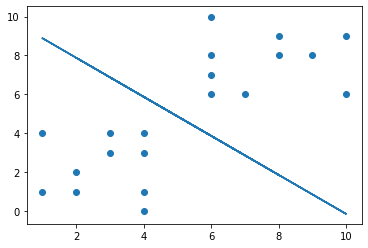

In [5]:
plt.scatter(x_train[:,0],x_train[:,1])
plt.plot(x_train[:,0],(model.w[0]*x_train[:,0]+model.b)/-model.w[1])